In [3]:
# load the required packages
import pandas as pd
import geopandas as gpd
from shapely import wkt

import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline

In [4]:
data = pd.read_stata(r'../regression analysis/regression_analysis.dta')
data['geometry'] = data['geometry'].apply(wkt.loads)
data = gpd.GeoDataFrame(data, geometry = data.geometry, crs = 'epsg:4326')

In [5]:
'''
# this code is to generate the figure 1's base map
name_city = data['city'].unique().tolist()
for name in name_city:
    df = data[data['city'] == name]
    df = df[df['year'] == 2020]
     
    df.to_file(r'figure_1_base_map\{}.shp'.format(name))
'''

"\nname_city = data['city'].unique().tolist()\nfor name in name_city:\n    df = data[data['city'] == name]\n    df = df[df['year'] == 2020]\n     \n    df.to_file(r'figure_1_base_map\\{}.shp'.format(name))\n"

In [18]:
df = pd.read_csv("aggregated hospital ratio data/aggregated ratio.csv")
city_order = {'beijing': 0, 'tianjin': 1, 'shanghai': 2, 'nanjing': 3, 'hangzhou': 4, 'guangzhou': 5, 
              'shenzhen': 6, 'chengdu': 7, 'chongqing': 8, 'wuhan': 9, "xi'an": 10}
df['city_rank'] = df['city'].map(city_order)
df = df.sort_values('city_rank', ascending = False)
df = df.drop('city_rank', axis=1)

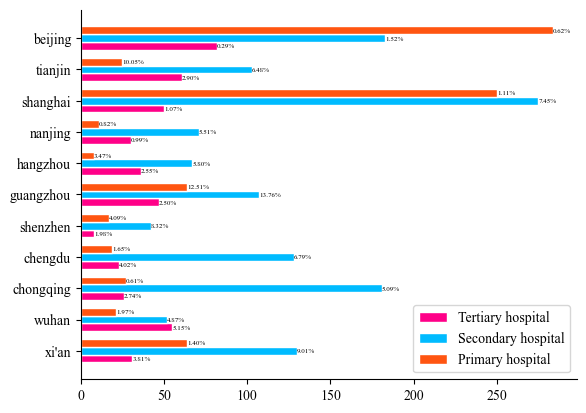

In [19]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
barHeight = 0.25
r1 = np.arange(len(df['sanji']))
r2 = [y + barHeight for y in r1]
r3 = [y + barHeight for y in r2]

fig, ax = plt.subplots()  # Create a figure and axis

rect1 = ax.barh(r1, df['sanji'], color='#FF0088', height=barHeight, edgecolor='white', label='Tertiary hospital')
rect2 = ax.barh(r2, df['erji'], color='#00BBFF', height=barHeight, edgecolor='white', label='Secondary hospital')
rect3 = ax.barh(r3, df['yiji'], color='#FF5511', height=barHeight, edgecolor='white', label='Primary hospital')

i = 0
for rect in rect1:
    width = rect.get_width()
    ax.text(width, rect.get_y() + rect.get_height() / 2, df['sp'][i], size=5, ha='left', va='center')
    i += 1

i = 0
for rect in rect2:
    width = rect.get_width()
    ax.text(width, rect.get_y() + rect.get_height() / 2, df['ep'][i], size=5, ha='left', va='center')
    i += 1

i = 0
for rect in rect3:
    width = rect.get_width()
    ax.text(width, rect.get_y() + rect.get_height() / 2, df['yp'][i], size=5, ha='left', va='center')
    i += 1

ax.yaxis.tick_left()  # Display ticks only on the left side
ax.xaxis.tick_bottom()  # Display ticks only on the bottom

plt.yticks([r + barHeight for r in range(len(df['sanji']))], df['city'])

# Create a legend
plt.legend()

# Remove the right and upper axis spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Show the plot
# plt.show()

plt.savefig('figure2.tiff', bbox_inches='tight', dpi=400)